In [61]:
# Import the modules
import numpy as np
from scipy import linalg
from scipy.linalg import solve
from scipy import optimize
import scipy.optimize
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from scipy import integrate

In [23]:
#
# Program: EX4.1 (1 point) Do a program that provides the solution to the following system of linear equations
#
# Input: Two arrays 
# ouput: x - of every equation
#

In [24]:
# System of linear equations

# x1 + 9x2 +2x3 +x4 +x5 = 170
# 10x1 + x2 +2x3 +x4 +x5 = 180
# x1  +5x3 +x4 +x5 = 140
# 2x1 +  x3 +2x4 +9x5 = 180
# 2x1 + x2 +2x3 +13x4 +2x5 = 350

In [25]:
# Define the matrix
A = np.array([
    [1, 9, 2, 1, 1],
    [10, 1, 2, 1, 1],
    [1, 0, 5, 1, 1],
    [2, 0, 1, 2, 9],
    [2, 1, 2, 13, 2]
])

# Define the 2nd matrix
B = np.array([170, 180, 140, 180, 350])

# Solve the system of linear equations
C = solve(A, B)

print(f'Solution: {C}')

Solution: [ 9.94184894  9.93458006 19.80374017 19.86321285 11.17623736]


In [26]:
#
# Program: EX4.2 To study the kinectics of one enzyme you perform experiments 
#          at different substrate concentrations S = [0, 0.2, 0.4, 0.6, 0.8, 1., 1.2, 1.4, 1.6, 1.8, 2] mM 
#          and measure the following rates of the reaction v = [0,  56.35, 94.64, 125.70, 120.19, 130.21, 163.47, 158.67, 145.22, 165.01, 152.58]
#
# Input:
# Ouput:
#
# Notes: Fit the data to the Michaelis-Menten equation 
#        Report the best fit parameters and their error
#        Plot the experimental data together with your fitted function and save your plot
#

In [27]:
# Define the matrix from the data

S = np.array([0, 0.2, 0.4, 0.6, 0.8, 1., 1.2, 1.4, 1.6, 1.8, 2])
v = np.array([0,  56.35, 94.64, 125.70, 120.19, 130.21, 163.47, 158.67, 145.22, 165.01, 152.58])

In [28]:
# Michaelis-Menten equation 
# v = (Vmax*S)/(Km + S)

In [30]:
# Define the function to optimize

def test_func(S, Vmax, Km):

    return (Vmax * S) / (Km + S)

In [38]:
# Fit the data to the function test_func

params, params_covariance = scipy.optimize.curve_fit(test_func, S, v)

*** Fitting parameters: ***
p1 = 197.4053068680757
p2 = 0.428907242726209
*** Standard deviation of parameters: ***
p1_std = 12.713001152145965
p2_std = 0.09352959041968353


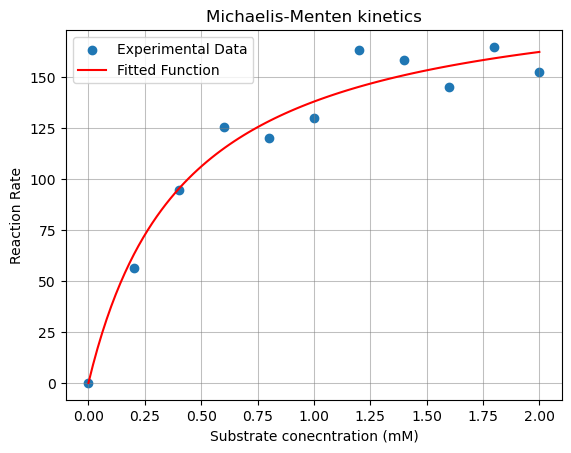

In [56]:
# Add a grid 
plt.grid(axis='both', 
         color="grey",
         linestyle="-",
         alpha=0.5, 
         linewidth=0.75)

# Plot data
plt.scatter(S, v, label='Experimental Data')

# Plot fitting function using best fit parameters

x_fit = np.linspace(0, 2, 100)
y_fit = test_func(x_fit, params[0], params[1])
plt.plot(x_fit, y_fit, label='Fitted Function', color='red')

p1_std=np.sqrt(np.diag(params_covariance))[0]
p2_std=np.sqrt(np.diag(params_covariance))[1]

# Print fitting parameters and their standard deviation
print("*** Fitting parameters: ***")
print(f"p1 = {params[0]}")
print(f"p2 = {params[1]}" )
print("*** Standard deviation of parameters: ***")
print(f"p1_std = {p1_std}")
print(f"p2_std = {p2_std}")

# Add legend and show plot
plt.legend()
plt.xlabel('Substrate conecntration (mM)')
plt.ylabel('Reaction Rate')
plt.title('Michaelis-Menten kinetics')


# Save the figure in a folder
plt.savefig('C:/Users/kinga/Desktop/Praha_summer/Pyhton/L04/EX_4.2.png')


# Show the plot
plt.show()

In [58]:
# 
# Program: EX4.3 (2 points) Consider a system consisting of two particles 
#          bonded by a harmonic oscilator, whose energy is given by  𝑈(𝑟)=𝑘(𝑟−𝑙0)²
#          were 𝑟 is the distance between particles,  𝑘 is the harmonic constant 
#          and  𝑙0 is the equilibrium bond length
#
# Input: Values of constants
# Output: Accumulated probability of finding the particles below a given distance 𝑟
#
#

In [68]:
# Input of the data
k=0.2
beta=1
l=5
r=10

In [69]:
# Energy function
def U(r, k):
    return k * (r - l0) ** 2

In [70]:
# Define the integration limits
lower_limit=0
upper_limit=r

In [90]:
# Define the function to integrate
def function_to_integrate(r, beta):
    return r*4*np.pi*r**2*np.exp(-(beta*U(r,k)))

In [91]:
# Calculate the integrals
quad_result, quad_estimated_error=integrate.quad(function_to_integrate, lower_limit, upper_limit, args=(beta,))
quadrature_result, quadrature_estimated_error=integrate.quadrature(function_to_integrate, lower_limit, upper_limit, args=(beta,))

In [92]:
# Print the results
print(f'The quad method yields a result of {quad_result:.4g} +/- {quad_estimated_error:.4g}')
print(f'The quadrature method yields a result of {quadrature_result:.4g} +/- {quadrature_estimated_error:.4g}')
print(f'The absolute difference between both methods is {abs(quad_result-quadrature_result):4g}')

The quad method yields a result of 8049 +/- 3.896e-10
The quadrature method yields a result of 8049 +/- 4.266e-05
The absolute difference between both methods is 3.79659e-06


In [93]:
# Calculate the integrals
r_values = np.linspace(lower_limit, upper_limit, 50)
integrated_values = [integrate.quad(function_to_integrate, lower_limit, r, args=(beta,))[0] for r in r_values]

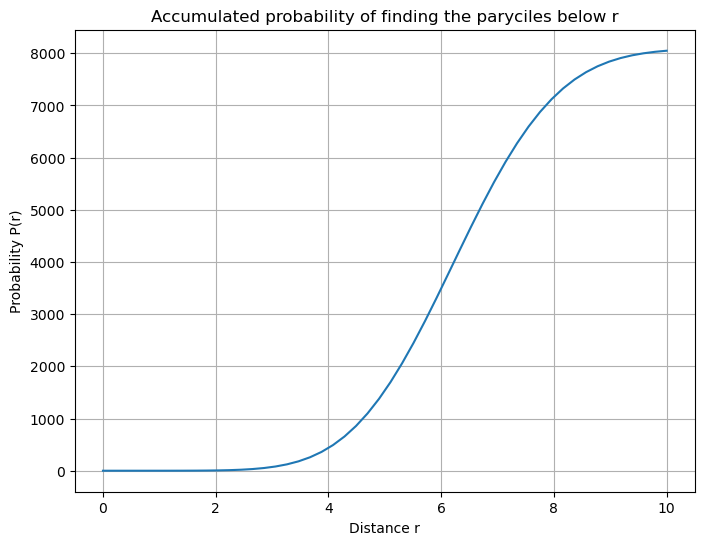

In [95]:
# Plot the integrated function
plt.figure(figsize=(8, 6))
plt.plot(r_values, integrated_values)
plt.xlabel('Distance r')
plt.ylabel('Probability P(r)')
plt.title('Accumulated probability of finding the paryciles below r')
plt.grid(True)

# Save the figure in a folder
plt.savefig('C:/Users/kinga/Desktop/Praha_summer/Pyhton/L04/EX_4.3.png')


# Show the plot
plt.show()